<a href="https://colab.research.google.com/github/dsk40/Newbieron-Tasks/blob/main/Logistic_Consignment_Pricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Packages**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.offline as py

**Importing csv File**

In [ ]:
df=pd.read_csv("/content/Logistic Consignment Pricing.csv")

In [ ]:
df.head()

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN


**Checking datatypes of csv file**

In [ ]:
df.dtypes

ID                                int64
Project Code                     object
PQ #                             object
PO / SO #                        object
ASN/DN #                         object
Country                          object
Managed By                       object
Fulfill Via                      object
Vendor INCO Term                 object
Shipment Mode                    object
PQ First Sent to Client Date     object
PO Sent to Vendor Date           object
Scheduled Delivery Date          object
Delivered to Client Date         object
Delivery Recorded Date           object
Product Group                    object
Sub Classification               object
Vendor                           object
Item Description                 object
Molecule/Test Type               object
Brand                            object
Dosage                           object
Dosage Form                      object
Unit of Measure (Per Pack)        int64
Line Item Quantity                int64


In [ ]:
# Check for missing values
print(df.isnull().sum())

ID                                 0
Project Code                       0
PQ #                               0
PO / SO #                          0
ASN/DN #                           0
Country                            0
Managed By                         0
Fulfill Via                        0
Vendor INCO Term                   0
Shipment Mode                    360
PQ First Sent to Client Date       0
PO Sent to Vendor Date             0
Scheduled Delivery Date            0
Delivered to Client Date           0
Delivery Recorded Date             0
Product Group                      0
Sub Classification                 0
Vendor                             0
Item Description                   0
Molecule/Test Type                 0
Brand                              0
Dosage                          1736
Dosage Form                        0
Unit of Measure (Per Pack)         0
Line Item Quantity                 0
Line Item Value                    0
Pack Price                         0
U

In [ ]:
#null values in percentages
df.isnull().mean()*100

ID                            0.000000
Project Code                  0.000000
Country                       0.000000
Shipment Mode                 3.487021
Product Group                 0.000000
Sub Classification            0.000000
Vendor                        0.000000
Item Description              0.000000
Brand                         0.000000
Unit of Measure (Per Pack)    0.000000
Line Item Quantity            0.000000
Line Item Value               0.000000
Pack Price                    0.000000
Unit Price                    0.000000
Manufacturing Site            0.000000
Line Item Insurance (USD)     2.779930
dtype: float64

In [ ]:
# Data types and column names
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            10324 non-null  int64  
 1   Project Code                  10324 non-null  object 
 2   PQ #                          10324 non-null  object 
 3   PO / SO #                     10324 non-null  object 
 4   ASN/DN #                      10324 non-null  object 
 5   Country                       10324 non-null  object 
 6   Managed By                    10324 non-null  object 
 7   Fulfill Via                   10324 non-null  object 
 8   Vendor INCO Term              10324 non-null  object 
 9   Shipment Mode                 9964 non-null   object 
 10  PQ First Sent to Client Date  10324 non-null  object 
 11  PO Sent to Vendor Date        10324 non-null  object 
 12  Scheduled Delivery Date       10324 non-null  object 
 13  D

**Statasic Analysis**

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,10324.0,51098.968229,31944.332496,1.0,12795.7500,57540.500,83648.2500,86823.00
Unit of Measure (Per Pack),10324.0,77.990895,76.579764,1.0,30.0000,60.000,90.0000,1000.00
Line Item Quantity,10324.0,18332.534870,40035.302961,1.0,408.0000,3000.000,17039.7500,619999.00
Line Item Value,10324.0,157650.567347,345292.066979,0.0,4314.5925,30471.465,166447.1400,5951990.40
Pack Price,10324.0,21.910241,45.609223,0.0,4.1200,9.300,23.5925,1345.64
Unit Price,10324.0,0.611701,3.275808,0.0,0.0800,0.160,0.4700,238.65
Line Item Insurance (USD),10037.0,240.117626,500.190568,0.0,6.5100,47.040,252.4000,7708.44


In [ ]:
df.describe(include=object).T

,count,unique,top,freq
Project Code,10324,142,116-ZA-T30,768
Country,10324,21,South Africa,1406
Shipment Mode,9964,4,Air,6113
Product Group,10324,5,ARV,8550
Sub Classification,10324,6,Adult,6595
Vendor,10324,31,SCMS from RDC,5404
Item Description,10324,184,"Efavirenz 600mg, tablets, 30 Tabs",755
Brand,10324,48,Generic,7285
Manufacturing Site,10324,88,"Aurobindo Unit III, India",3172


**Dropping unnecessary columns in dataframe**

In [ ]:
# List of columns to drop
columns_to_drop = [
    'PQ #', 'PO / SO #', 'ASN/DN #', 'Managed By', 'Fulfill Via', 'Vendor INCO Term',
    'PQ First Sent to Client Date', 'PO Sent to Vendor Date',
    'Scheduled Delivery Date', 'Delivered to Client Date', 'Delivery Recorded Date',
   'Molecule/Test Type', 'Dosage', 'Dosage Form',
   'First Line Designation', 'Weight (Kilograms)', 'Freight Cost (USD)'
]

# Drop the columns
df.drop(columns=columns_to_drop, inplace=True)

In [ ]:
df.head()

,ID,Project Code,Country,Shipment Mode,Product Group,Sub Classification,Vendor,Item Description,Brand,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,Line Item Insurance (USD)
0,1,100-CI-T01,Côte d'Ivoire,Air,HRDT,HIV test,RANBAXY Fine Chemicals LTD.,"HIV, Reveal G3 Rapid HIV-1 Antibody Test, 30 T...",Reveal,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,NaN
1,3,108-VN-T01,Vietnam,Air,ARV,Pediatric,Aurobindo Pharma Limited,"Nevirapine 10mg/ml, oral suspension, Bottle, 2...",Generic,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",NaN
2,4,100-CI-T01,Côte d'Ivoire,Air,HRDT,HIV test,Abbott GmbH & Co. KG,"HIV 1/2, Determine Complete HIV Kit, 100 Tests",Determine,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,NaN
3,15,108-VN-T01,Vietnam,Air,ARV,Adult,SUN PHARMACEUTICAL INDUSTRIES LTD (RANBAXY LAB...,"Lamivudine 150mg, tablets, 60 Tabs",Generic,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",NaN
4,16,108-VN-T01,Vietnam,Air,ARV,Adult,Aurobindo Pharma Limited,"Stavudine 30mg, capsules, 60 Caps",Generic,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",NaN


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'ARV'),
  Text(1, 0, 'HRDT'),
  Text(2, 0, 'ANTM'),
  Text(3, 0, 'ACT'),
  Text(4, 0, 'MRDT')])

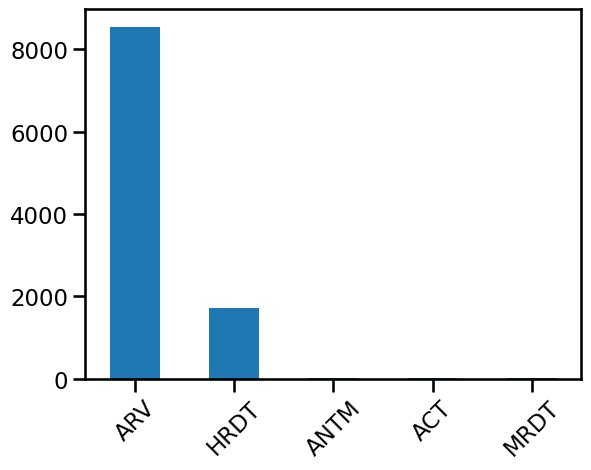

In [ ]:
df["Product Group"].value_counts().plot(kind='bar')
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Adult'),
  Text(1, 0, 'Pediatric'),
  Text(2, 0, 'HIV test'),
  Text(3, 0, 'HIV test - Ancillary'),
  Text(4, 0, 'Malaria'),
  Text(5, 0, 'ACT')])

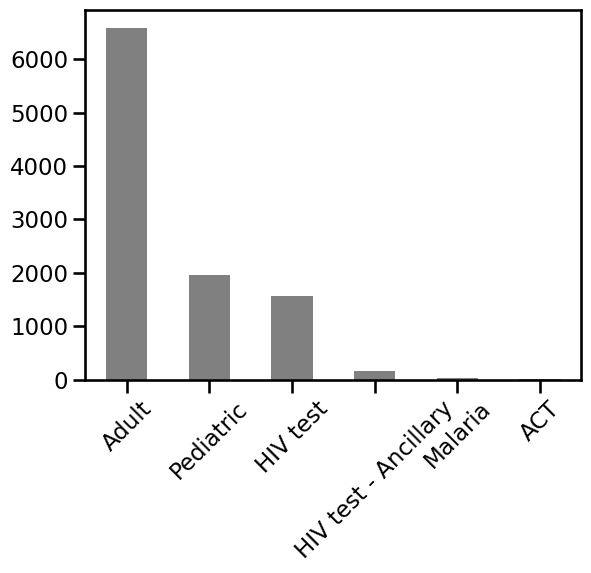

In [ ]:
df["Sub Classification"].value_counts().plot(kind="bar", color ='grey')
plt.xticks(rotation=45)

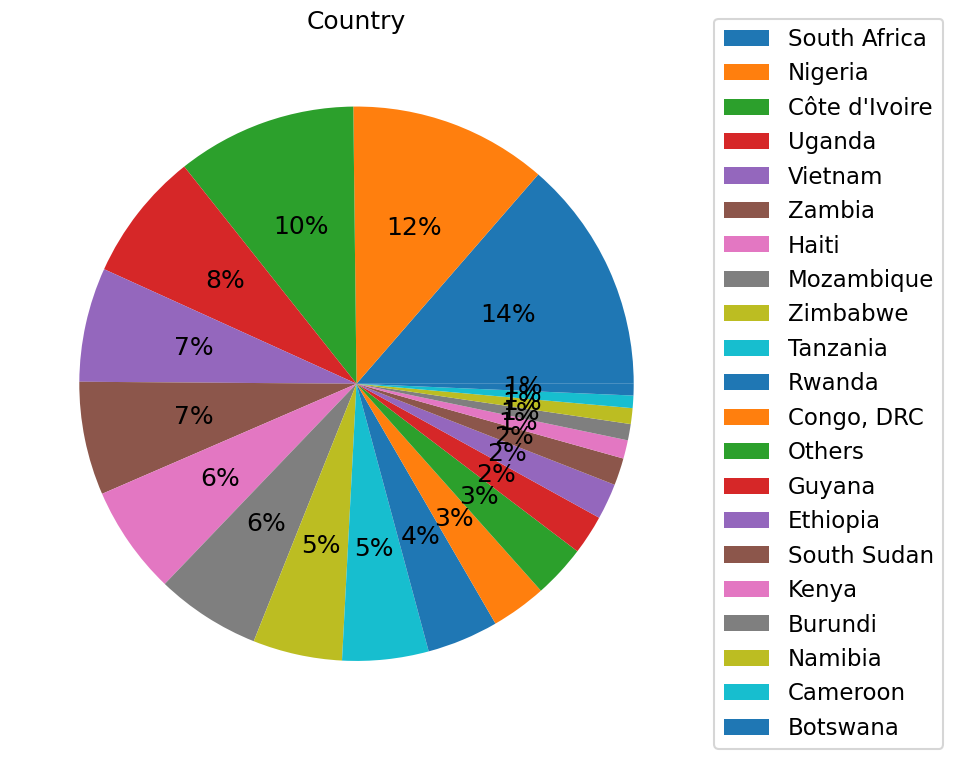

In [ ]:
counts = df['Country'].value_counts()
idx = counts[counts.lt(60)].index
df.loc[df['Country'].isin(idx), 'Country'] = 'Others'
df["Country"].value_counts().plot.pie(label='',title="Country",legend=True,figsize=(9,9),autopct='%1.0f%%',labeldistance=None)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [ ]:
ItemCount = df["Country"].value_counts().nlargest(10)
print("Top 10 Countries Wise Count \n")
print(ItemCount)

Top 10 Countries Wise Count 

South Africa     1406
Nigeria          1194
Côte d'Ivoire    1083
Uganda            779
Vietnam           688
Zambia            683
Haiti             655
Mozambique        631
Zimbabwe          538
Tanzania          519
Name: Country, dtype: int64


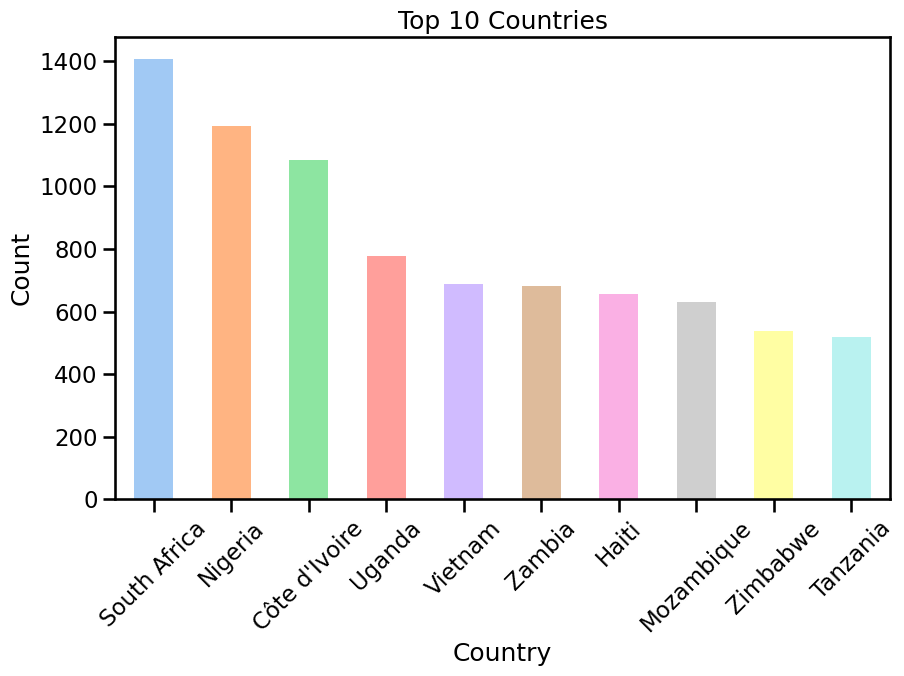

In [ ]:
top_countries = df['Country'].value_counts().head(10)

# Create a color palette
colors = sns.color_palette("pastel")

# Create a bar plot with different colors
plt.figure(figsize=(10, 6))
top_countries.plot(kind='bar', color=colors)
plt.title('Top 10 Countries')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

**Total Pack Price for Top 10 Countries**

Total Pack Price for Top 10 Countries

Country
Nigeria          25620.72
South Africa     24318.90
Côte d'Ivoire    22882.35
Haiti            19521.30
Uganda           15664.08
Mozambique       14092.40
Others           11975.10
Vietnam          11963.78
Zambia           11889.67
Tanzania         11047.72
Name: Pack Price, dtype: float64


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Nigeria'),
  Text(1, 0, 'South Africa'),
  Text(2, 0, "Côte d'Ivoire"),
  Text(3, 0, 'Haiti'),
  Text(4, 0, 'Uganda'),
  Text(5, 0, 'Mozambique'),
  Text(6, 0, 'Others'),
  Text(7, 0, 'Vietnam'),
  Text(8, 0, 'Zambia'),
  Text(9, 0, 'Tanzania')])

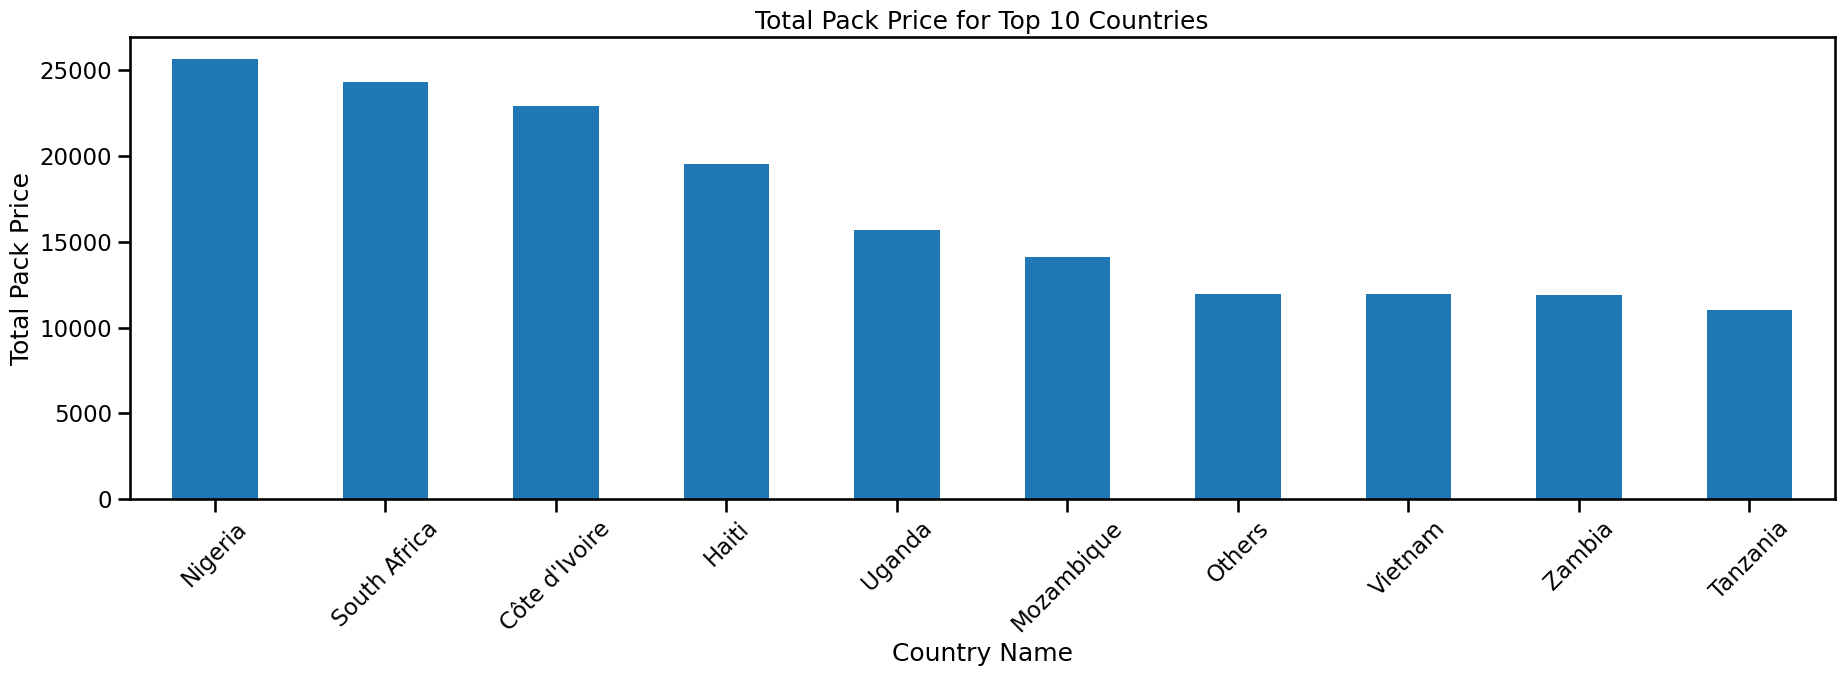

In [ ]:
TotalPrice = df.groupby(['Country'])['Pack Price'].sum().nlargest(10)
print("Total Pack Price for Top 10 Countries\n")
print(TotalPrice)
plt.figure(figsize=(22,6))
GraphData=df.groupby(['Country'])['Pack Price'].sum().nlargest(10)
GraphData.plot(kind='bar')
plt.title('Total Pack Price for Top 10 Countries')
plt.ylabel('Total Pack Price')
plt.xlabel('Country Name')
plt.xticks(rotation=45)

**Shipment Mode**

In [ ]:
ShippingMode = df['Shipment Mode'].value_counts()
labels = np.array(ShippingMode.index)
sizes = np.array((ShippingMode / ShippingMode.sum()) * 100)

trace = go.Pie(labels=labels, values=sizes)
layout = go.Layout(title="Shipment Mode")
dat = [trace]
fig = go.Figure(data=dat, layout=layout)
py.iplot(fig, filename="Shipment_Mode_Pie")

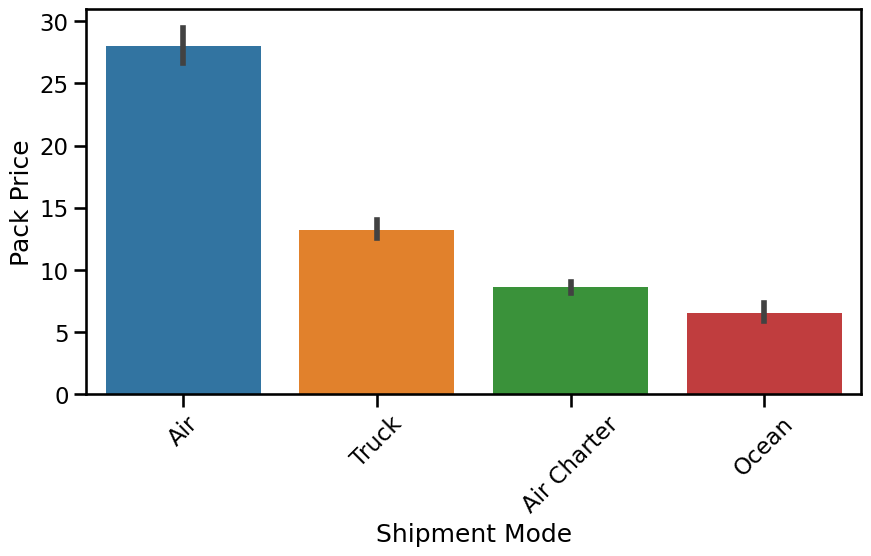

In [ ]:
plt.subplots(figsize = (10,5))
plt.xticks(rotation = 90)
sns.barplot(x='Shipment Mode',y= 'Pack Price', data = df)
plt.xticks(rotation=45)
plt.show()

**Top 10 Manufacturing Site**

Manufacturing Site
Aurobindo Unit III, India         3172
Mylan (formerly Matrix) Nashik    1415
Hetero Unit III Hyderabad IN       869
Cipla, Goa, India                  665
Strides, Bangalore, India.         540
Alere Medical Co., Ltd.            481
Trinity Biotech, Plc               405
ABBVIE Ludwigshafen Germany        366
Inverness Japan                    345
ABBVIE (Abbott) Logis. UK          219
dtype: int64


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Aurobindo Unit III, India'),
  Text(1, 0, 'Mylan (formerly Matrix) Nashik'),
  Text(2, 0, 'Hetero Unit III Hyderabad IN'),
  Text(3, 0, 'Cipla, Goa, India'),
  Text(4, 0, 'Strides, Bangalore, India.'),
  Text(5, 0, 'Alere Medical Co., Ltd.'),
  Text(6, 0, 'Trinity Biotech, Plc'),
  Text(7, 0, 'ABBVIE Ludwigshafen Germany'),
  Text(8, 0, 'Inverness Japan'),
  Text(9, 0, 'ABBVIE (Abbott) Logis. UK')])

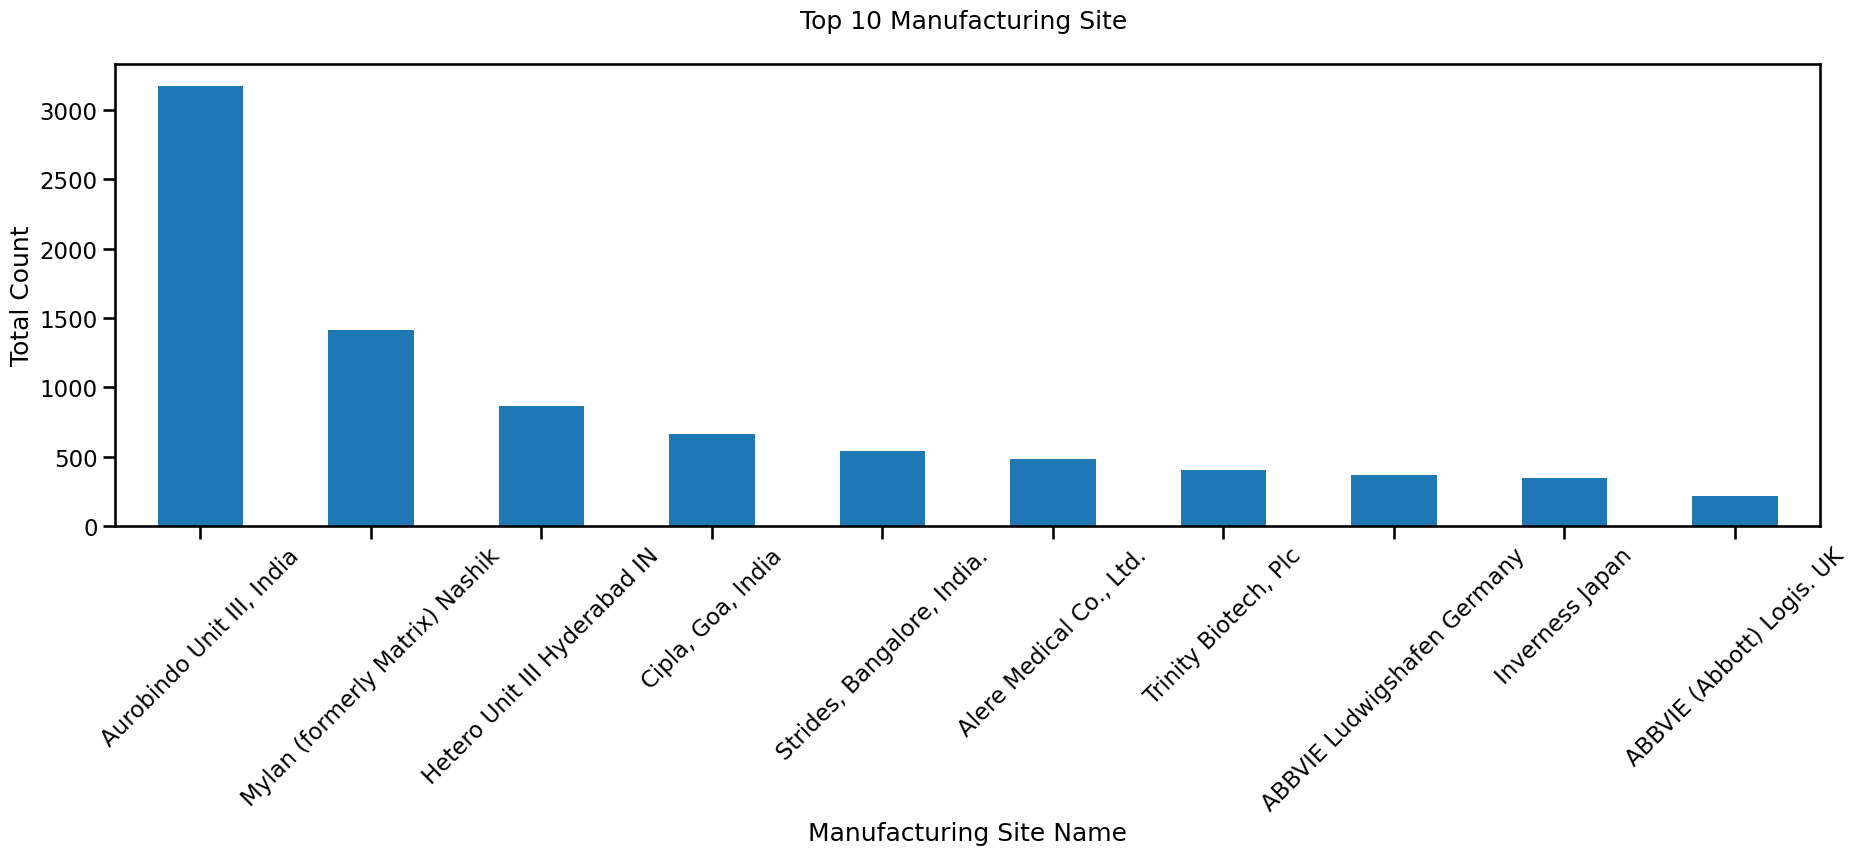

In [ ]:
plt.figure(figsize=(22,6))
TopTenManufacturingSite=df.groupby('Manufacturing Site').size().nlargest(10)
print(TopFiveManufacturingSite)
TopFiveManufacturingSite.plot(kind='bar')
plt.title('Top 10 Manufacturing Site \n')
plt.ylabel('Total Count')
plt.xlabel('Manufacturing Site Name')
plt.xticks(rotation=45)

**Percentage Distribution of Vendors**

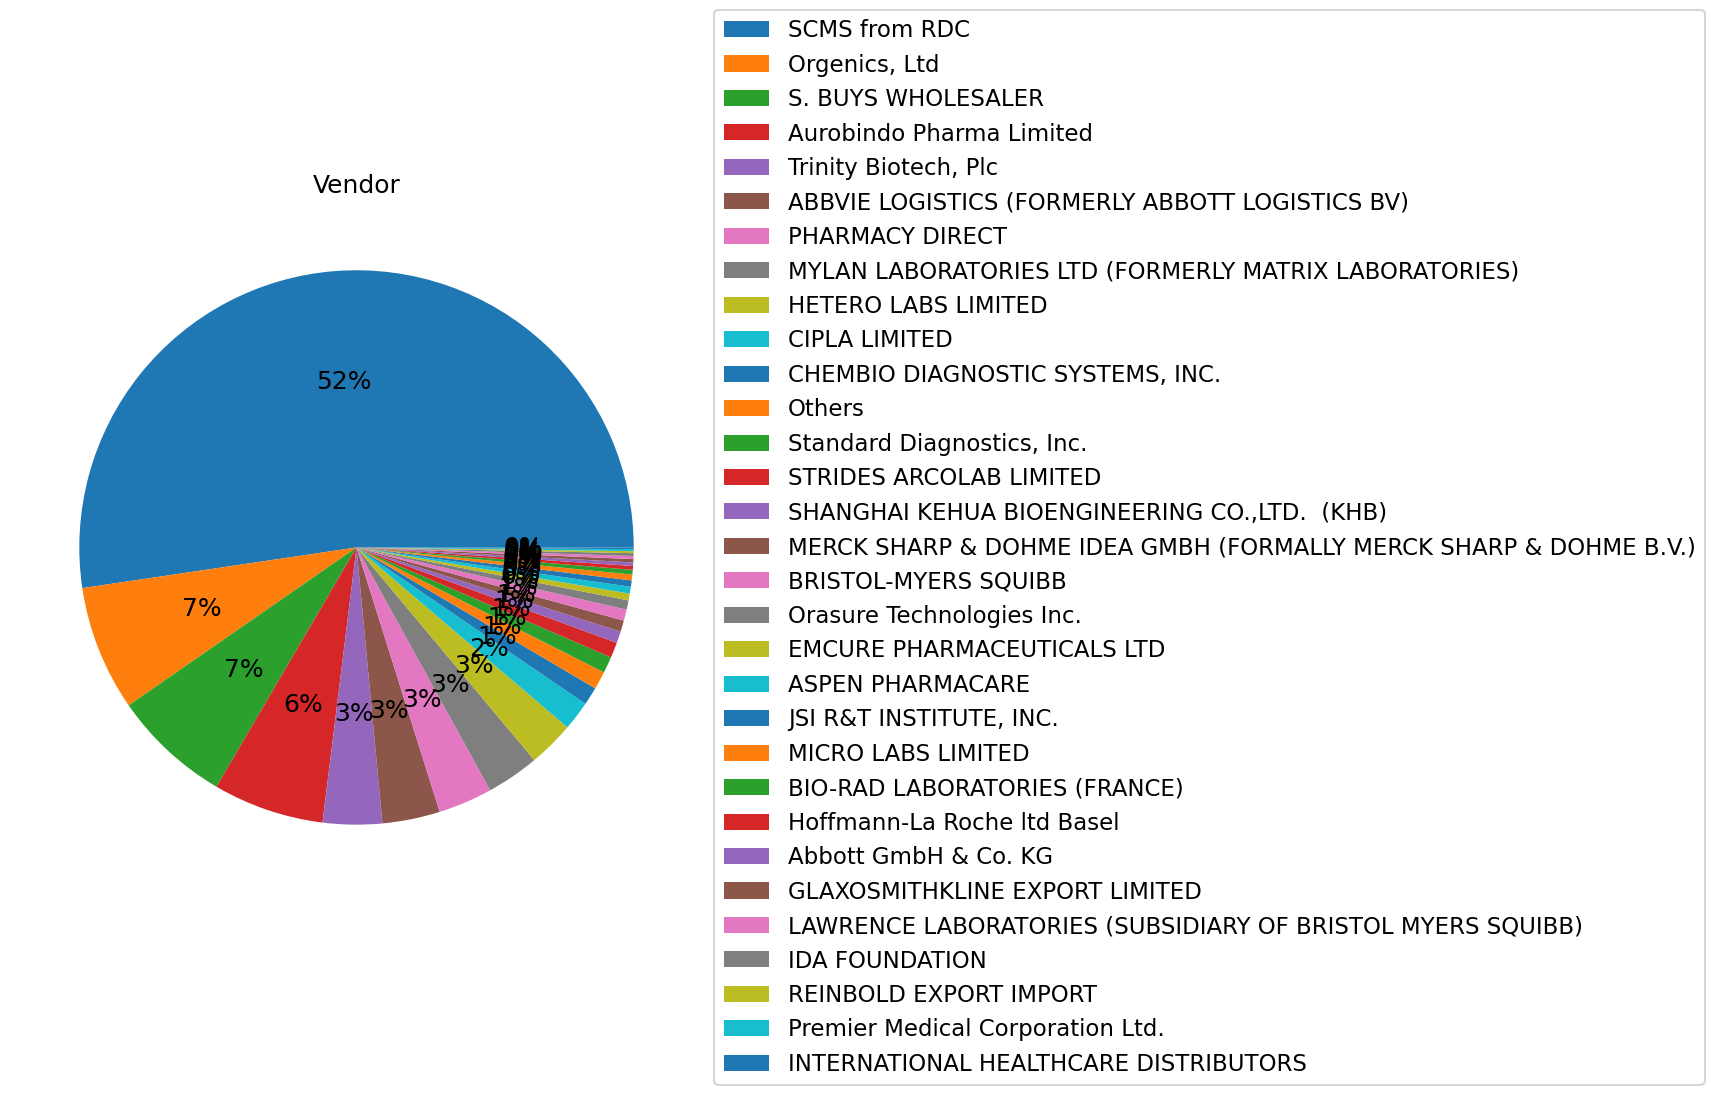

In [ ]:
counts = df['Vendor'].value_counts()
idx = counts[counts.lt(10)].index
df.loc[df['Vendor'].isin(idx), 'Vendor'] = 'Others'
df["Vendor"].value_counts().plot.pie(label='',title="Vendor",legend=True,figsize=(9,9),autopct='%1.0f%%',labeldistance=None)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [132]:
average_prices_by_mode = df.groupby('Shipment Mode')['Pack Price'].mean()
print(average_prices_by_mode)

Shipment Mode
Air            27.984085
Air Charter     8.638462
Ocean           6.568949
Truck          13.230212
Name: Pack Price, dtype: float64


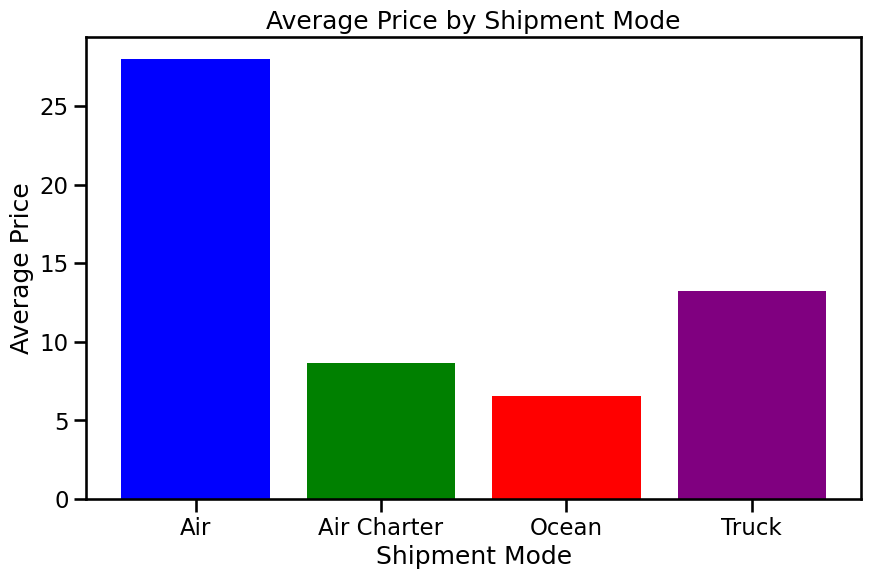

In [135]:
# Group by 'Shipment Mode' and calculate the mean 'Pack Price'
average_prices_by_mode = df.groupby('Shipment Mode')['Pack Price'].mean().reset_index()

# Define a custom color palette
colors = ['blue', 'green', 'red', 'purple', 'orange']

# Create a bar plot with different colors
plt.figure(figsize=(10, 6))
plt.bar(average_prices_by_mode['Shipment Mode'], average_prices_by_mode['Pack Price'], color=colors)
plt.title('Average Price by Shipment Mode')
plt.xlabel('Shipment Mode')
plt.ylabel('Average Price')
plt.show()